# **Customers in Restaurants**

---------------------------
## **Objective**
---------------------------

The objective of this problem is to build a predictive model that answers the question: "would the customer wait for food or leave?" using available data.

-------------------------
## **Dataset Description**
-------------------------

- **Alt** - Is there a suitable alternative restaurant available?
- **Bar** - Whether the restaurant has a comfortable bar area to wait in.
- **Fri** - True if it's a Friday or Saturday.
- **Hungry** - Whether we are hungry or not.
- **Patrons** - How many people are there in the restaurant? Values are None, Some, and Full which are encoded as 0, 1, and 2, respectively.
- **Price** - The restaurant's price range.
- **Raining** - Whether it is raining outside or not.
- **Reservation** - Whether we made a reservation or not.
- **Type**- The kind of restaurant.
- **Wait Estimate** - The estimated wait time. Values are binned into four categories 0-10, 10-30, 30-60, >60. 

## **Importing the libraries**

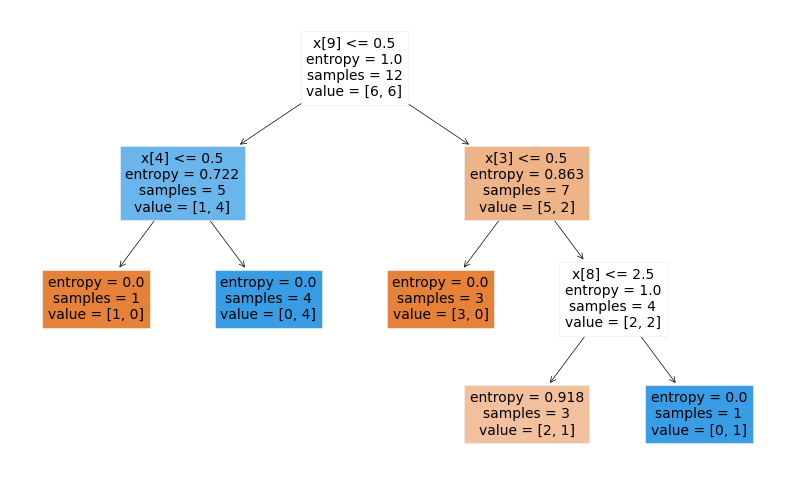

In [2]:
import numpy as np

from sklearn import tree

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


tp = {'French': 0, 'Thai': 1, 'Italian': 2, 'Burger': 3}  # To encode the Type variable
price = {'$': 0, '$$': 1, '$$$': 2}                       # To encode the Price variable 
est = {'0-10': 0, '10-30': 1, '30-60': 2, '>60': 3}       # To encode the Wait Estimate
pat = {'None': 0, 'Some': 1, 'Full': 2}                   # To encode the Patrons variable

x = np.array([
# 0     1      2     3       4            5             6      7      8              9
# Alt   Bar    Fri    Hun    Pat          Price         Rain   Res    Type           Est
[True,  False, False, True,  pat['Some'], price['$$$'], False, True,  tp['French'],  est['0-10']], # True
[True,  False, False, True,  pat['Full'], price['$'],   False, False, tp['Thai'],    est['30-60']], # False
[False, True,  False, False, pat['Some'], price['$'],   False, False, tp['Burger'],  est['0-10']], # True 
[True,  False, True,  True,  pat['Full'], price['$'],   True,  False, tp['Thai'],    est['10-30']], # Frue
[True,  False, True,  False, pat['Full'], price['$$$'], False, True,  tp['French'],  est['>60']], # False
[False, True,  False, True,  pat['Some'], price['$$'],  True,  True,  tp['Italian'], est['0-10']], # True 
[False, True,  False, False, pat['None'], price['$'],   True,  False, tp['Thai'],    est['10-30']], # False 
[False, False, False, True,  pat['Some'], price['$$'],  True,  True,  tp['Thai'],    est['0-10']], # True
[False, True,  True,  False, pat['Full'], price['$'],   True,  False, tp['Burger'],  est['>60']], # False
[True,  True,  True,  True,  pat['Full'], price['$$$'], False, True,  tp['Italian'], est['10-30']], # False
[False, False, False, False, pat['None'], price['$'],   False, False, tp['Thai'],    est['0-10']], # False
[True,  True,  True,  True,  pat['Full'], price['$'],   False, False, tp['Burger'],  est['30-60']], # True
])

y = np.array([True, False, True, True, False, True, False, True, False, False, False, True])

# def entropyfn(pos, neg):
#     log = np.log2
#     tot = pos+neg

#     pos = pos / tot
#     neg = neg / tot

#     if neg == 0:
#         return -pos * log(pos)
    
#     if pos == 0:
#         return -neg * log(neg)

#     return -pos * log(pos)-neg * log(neg)

# Build a Decision Tree Classifier
clf = tree.DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 3)

clf = clf.fit(x, y)

fig, ax = plt.subplots(figsize = (10, 6))

out = tree.plot_tree(clf, filled = True, fontsize = 10)

# for o in out:
    
#     arrow = o.arrow_patch
    
#     if arrow is not None: 
#         arrow.set_edgecolor('red') 
        
#         arrow.set_linewidth(3)
        
plt.show()

**Observations:**

- The estimated wait time is the first node in the decision tree, which implies that it provides the highest information gain while deciding whether a person would wait or not.
- The first node splits the data at 0.5, which means that in a majority of scenarios, the waiting time of more than 10 minutes is a significant factor in deciding whether the customer would wait or not.
- A customer would not even wait for 10 minutes if the restaurant has no customers, which makes sense. If there are some people in the restaurant, then the customer would wait.
- If a customer has to wait more than 10 minutes, then it depends on whether the customer is hungry or not. If a customer is not hungry, then he/she would not wait. 
- If a customer has to wait longer than 10 minutes and is hungry, then the customer would most likely wait if the restaurant serves burgers (assuming cuisine-specific restaurants do not serve burgers).